<a href="https://colab.research.google.com/github/Storm00212/SkyAcre/blob/main/Beef_ml_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
import pandas as pd
uploaded = files.upload()

Saving beef_health_realistic_dataset.csv to beef_health_realistic_dataset.csv


In [5]:
import pandas as pd
import io

# Replace 'dairy_multi_disease_dataset.csv' with the exact filename if different
df = pd.read_csv(io.BytesIO(uploaded['beef_health_realistic_dataset.csv']))

# Print all column names to identify the correct one for health status
print("DataFrame columns:", df.columns.tolist())

print("Dataset shape:", df.shape)
print("\nDisease label distribution:")
print(df['disease'].value_counts().sort_index())

print("\nFirst few rows:")# show dataset
df.head()#1st 5

DataFrame columns: ['animal_id', 'day', 'ambient_temp', 'feed_intake_kg', 'water_intake_l', 'body_condition_score', 'activity_index', 'disease']
Dataset shape: (108000, 8)

Disease label distribution:
disease
Healthy               89507
Heat Stress            3094
Lameness / Injury      2754
Nutritional Stress     8351
Tick-Borne Disease     4294
Name: count, dtype: int64

First few rows:


,animal_id,day,ambient_temp,feed_intake_kg,water_intake_l,body_condition_score,activity_index,disease
0,1,1,18.43,11.62,67.51,3.01,1.10,Healthy
1,1,2,19.07,5.84,33.29,2.29,1.30,Nutritional Stress
2,1,3,20.08,5.54,38.67,2.94,0.59,Tick-Borne Disease
3,1,4,20.18,9.22,42.20,3.39,1.03,Healthy
4,1,5,20.66,11.12,57.47,2.98,0.64,Healthy


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np

# Features (clinically relevant ones - excluding farm_id, day, and flock_type for modeling)
# Updated features based on the available columns in the poultry dataset
features = ['ambient_temp', 'feed_intake_kg', 'water_intake_l',]


X = df[features]
y = df['disease']

# Handle class imbalance with class_weight='balanced'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training samples:", X_train.shape[0])
print("Test samples:", X_test.shape[0])
#training samples complete

Training samples: 86400
Test samples: 21600


In [7]:
# Random Forest with balanced class weights (great for imbalanced farm data)
rf_model = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight='balanced',  # Helps with rare diseases
    n_jobs=-1
)

rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=200, n_jobs=-1,
                       random_state=42)

In [8]:
# Predictions
y_pred = rf_model.predict(X_test)
# Accuracy evaluation.
# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9699074074074074

Classification Report:
                    precision    recall  f1-score   support

           Healthy       0.97      1.00      0.98     17901
       Heat Stress       1.00      1.00      1.00       619
 Lameness / Injury       0.00      0.00      0.00       551
Nutritional Stress       0.96      0.99      0.98      1670
Tick-Borne Disease       0.99      0.91      0.95       859

          accuracy                           0.97     21600
         macro avg       0.78      0.78      0.78     21600
      weighted avg       0.95      0.97      0.96     21600



In [9]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
# accuracy/confusion matrix


Confusion Matrix:
[[17892     1     1     7     0]
 [    0   619     0     0     0]
 [  551     0     0     0     0]
 [    2     0     0  1657    11]
 [   23     0     0    54   782]]


Feature Importance:
          feature  importance
1  feed_intake_kg    0.372578
0    ambient_temp    0.342260
2  water_intake_l    0.285162


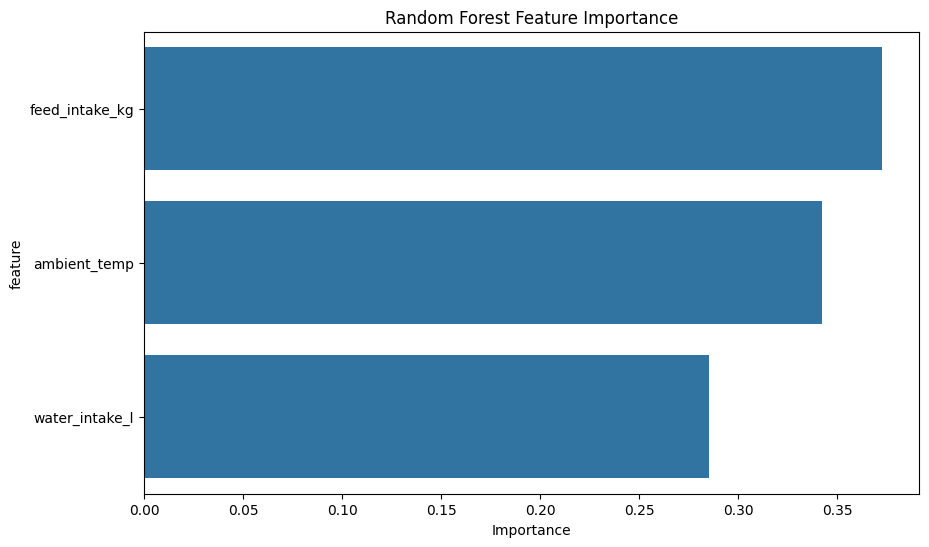

In [10]:
# Show important features for selection
import matplotlib.pyplot as plt
import seaborn as sns

importances = rf_model.feature_importances_
feature_imp = pd.DataFrame({
    'feature': features,
    'importance': importances
}).sort_values('importance', ascending=False)

print("Feature Importance:")
print(feature_imp)

# Plot for features
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_imp)
plt.title('Random Forest Feature Importance')
plt.xlabel('Importance')
plt.show()
#will remove less important features